<h3>Requirements</h3>
Tensorflow - 2.9.1<br/>
python 3.10.9 

In [19]:

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from NeuralNetwork import Sequential, LinearLayer, SigmoidLayer, SoftmaxLayer, CrossEntropyLoss, TanhLayer
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [20]:
epochs = 2000
learning_rate =  0.25
patience =5

In [21]:

def plot_graphs(epoch_losses):
    plt.subplot(1,2,1)
    plt.xlabel("Epoch")
    plt.ylabel("Training (CE) Loss")

    epochs_column = epoch_losses[:, 0]
    train_loss_column = epoch_losses[:, 1]
    val_loss_column =epoch_losses[:, 2]

    plt.plot(epochs_column, train_loss_column)


    plt.subplot(1,2,2)
    plt.xlabel("Epoch")
    plt.ylabel("Validation (CE) Loss")
    plt.plot(epochs_column, val_loss_column)

def post_process_results(output):
    result = np.zeros_like(output)
    for i in range(output.shape[0]):
        result[i, np.argmax(output[i])] = 1
    return result


In [22]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Preprocess the data
X_train = X_train.reshape((60000, 784)) / 255.0
X_test = X_test.reshape((10000, 784)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Create a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)


In [23]:
# Add layers to the neural network
model1 = Sequential()
model1.add(LinearLayer(input_size=784, output_size=64))
model1.add(TanhLayer())
model1.add(LinearLayer(input_size=64, output_size=32))
model1.add(TanhLayer())
model1.add(LinearLayer(input_size=32, output_size=10))
model1.add(SigmoidLayer())

model1.train(X_train,y_train, epochs = epochs, learning_rate = learning_rate,loss_print_count=5,x_val= X_val,y_val = y_val,patience=patience)

# Evaluate the neural network on the test set
y_test_pred = post_process_results( model1.predict(X_test))
print(y_test_pred)
print("Accuracy on test set - ", accuracy_score(y_test, y_test_pred), "\n")


Epoch 1550/2000: loss = 0.0173       Validation loss = 0.2288
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Accuracy on test set -  0.9659 



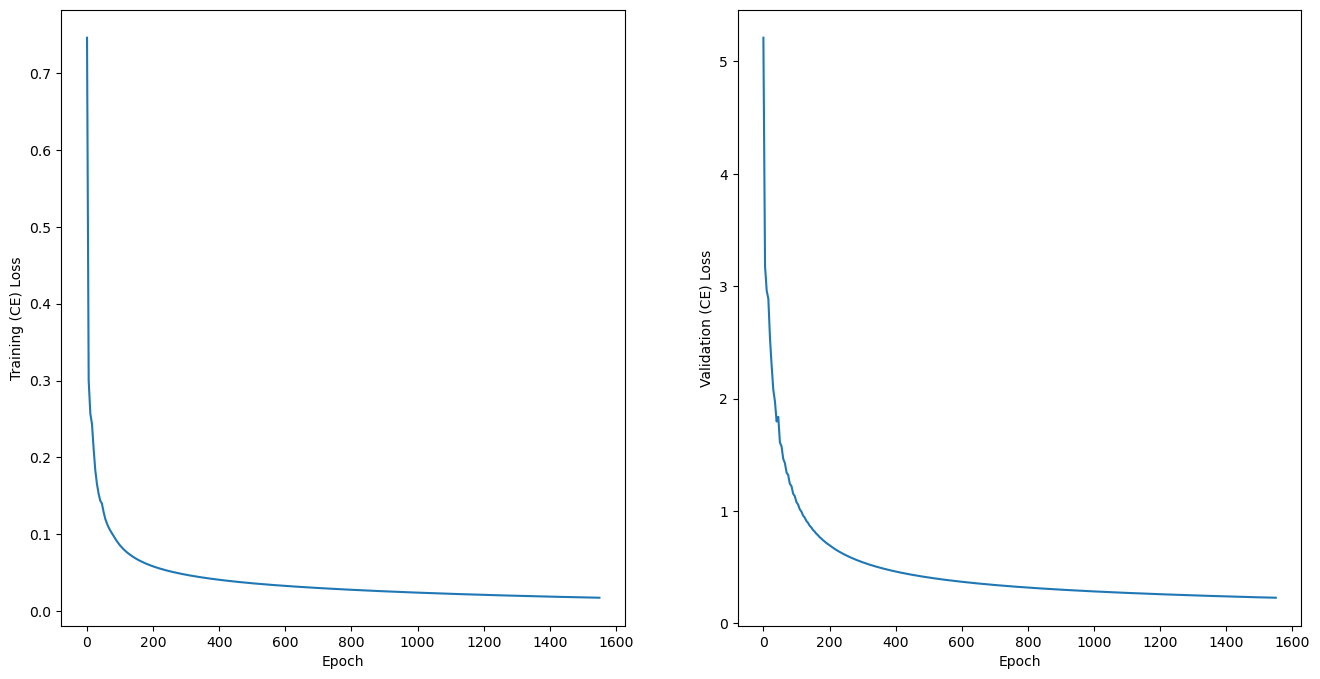

In [24]:
plot_graphs(model1.epoch_training_validation_loss)

Epoch 1995/2000: loss = 0.0540       Validation loss = 0.6365
Accuracy on test set -  0.9239 



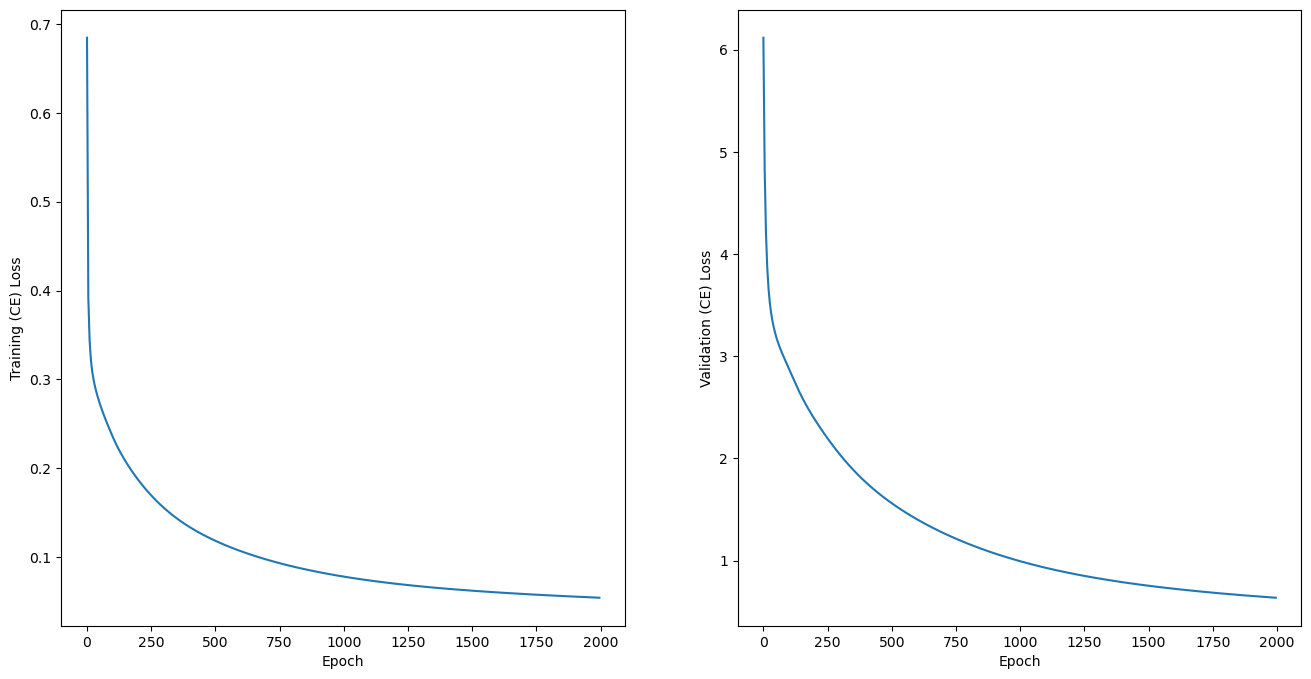

In [25]:
model2 = Sequential()
model2.add(LinearLayer(input_size=784, output_size=16))
model2.add(TanhLayer())
model2.add(LinearLayer(input_size=16, output_size=16))
model2.add(TanhLayer())
model2.add(LinearLayer(input_size=16, output_size=10))
model2.add(SigmoidLayer())

model2.train(X_train,y_train, epochs = epochs, learning_rate = 0.05,loss_print_count=5,x_val= X_val,y_val = y_val,patience=patience)

# Evaluate the neural network on the test set
y_test_pred = post_process_results( model2.predict(X_test))

print("Accuracy on test set - ", accuracy_score(y_test, y_test_pred), "\n")
plot_graphs(model2.epoch_training_validation_loss)

Epoch 1995/2000: loss = 0.0408       Validation loss = 0.4999
Accuracy on test set -  0.9409 



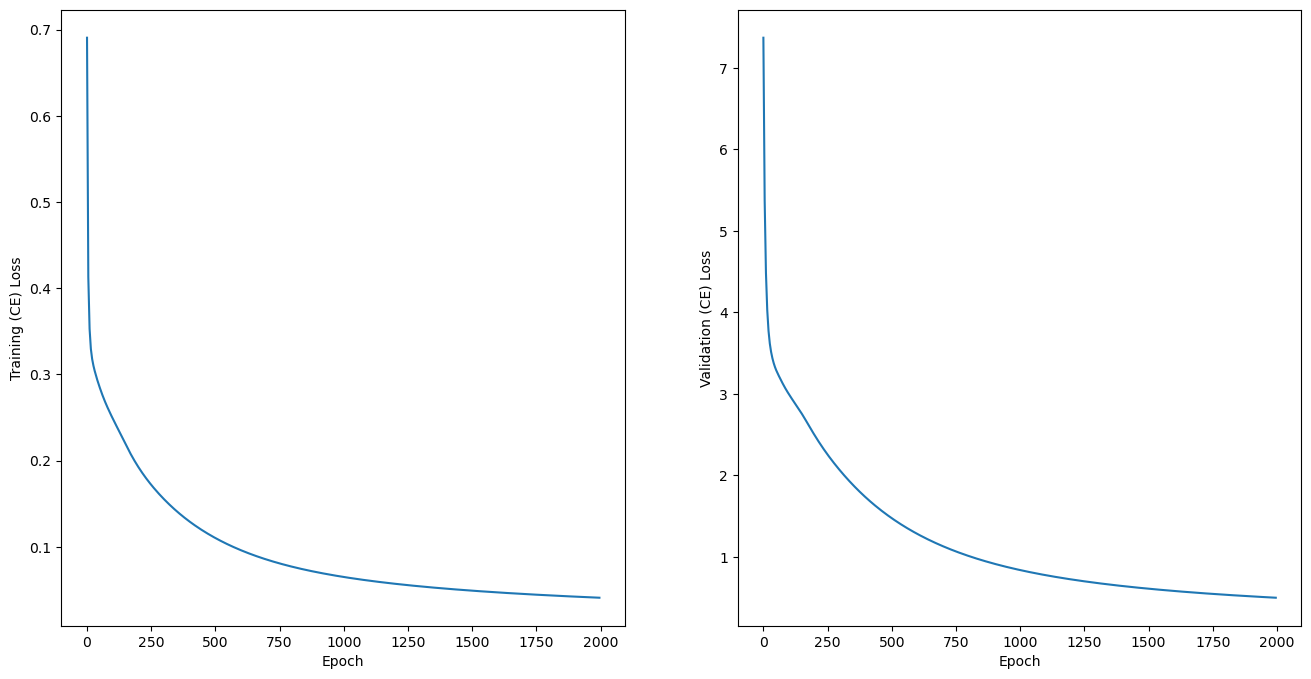

In [26]:
model3 = Sequential()
model3.add(LinearLayer(input_size=784, output_size=24))
model3.add(TanhLayer())
model3.add(LinearLayer(input_size=24, output_size=12))
model3.add(TanhLayer())
model3.add(LinearLayer(input_size=12, output_size=16))
model3.add(TanhLayer())
model3.add(LinearLayer(input_size=16, output_size=10))
model3.add(SigmoidLayer())

model3.train(X_train,y_train, epochs = epochs, learning_rate = 0.05,loss_print_count=5,x_val= X_val,y_val = y_val,patience=patience)

# Evaluate the neural network on the test set
y_test_pred = post_process_results( model3.predict(X_test))

print("Accuracy on test set - ", accuracy_score(y_test, y_test_pred), "\n")
plot_graphs(model3.epoch_training_validation_loss)